# Portfolio Allocation and Sharpe Ratio

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import quandl

### Creating Portfolio

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [5]:
#Grabbing the data from the quandl
aapl = quandl.get('WIKI/AAPL.11',start_date = start, end_date = end)
cisco = quandl.get('WIKI/CSCO.11',start_date = start, end_date = end)
ibm = quandl.get('WIKI/IBM.11',start_date = start, end_date = end)
amzn = quandl.get('WIKI/AMZN.11',start_date = start, end_date = end)

In [9]:
aapl.head()

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183


### Normalize the Price

Since each company stocks begin at a different price so we have to normalize the stocks for each so we could compare the highs and low. So we divide each Adj. Close by the initial price value.  
This is same as cumulative returns.

In [10]:
for stock in (aapl, cisco, ibm, amzn):
    stock['Normed Return'] = stock['Adj. Close']/stock['Adj. Close'][0]

In [11]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [12]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


### Allocations

For exploratory purposes we assume some portions of our investments in each of the company summing up to 100%  

 - 30% in Apple  
 - 20% in Cisco  
 - 10% in Amazon  
 - 40% in IBM.

Now we need to product our allocatios with the Normed Returns to get the actual values of our investments.

In [13]:
for stock, allo in zip((aapl, cisco, ibm, amzn ), [.3, .2, .4, .1]):
    stock['Allocation'] = stock['Normed Return'] * allo

In [14]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


### Investment

We assume we invested a million dollars in this overall portfolio.

In [15]:
for stock in [aapl, cisco, ibm, amzn]:
    stock['Position Values'] = stock['Allocation'] * 1000000

In [17]:
cisco.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,15.617341,1.000000,0.200000,200000.000000
2012-01-04,15.919125,1.019324,0.203865,203864.734300
2012-01-05,15.860445,1.015566,0.203113,203113.258186
2012-01-06,15.801764,1.011809,0.202362,202361.782072
2012-01-09,15.902359,1.018250,0.203650,203650.026838


### Total Portfolio Value

for finding the total portfolio values we need to concat the dataframes.

In [20]:
portfolio_values = pd.concat([aapl['Position Values'], cisco['Position Values'], ibm['Position Values'], amzn['Position Values']], axis = 1)
portfolio_values.columns = ['AAPL Pos','CSCO Pos' ,'IBM Pos', 'AMZN Pos']
portfolio_values.head()

,AAPL Pos,CSCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [22]:
portfolio_values['Total Pos'] = portfolio_values.sum(axis = 1)
portfolio_values.head()

,AAPL Pos,CSCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


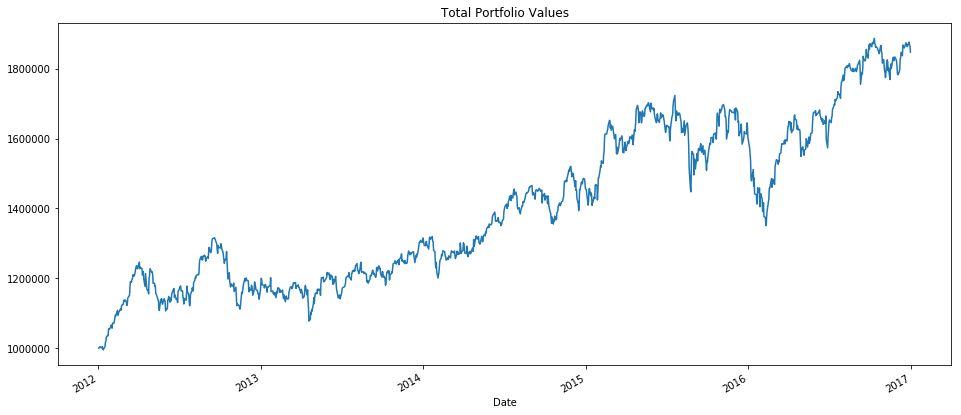

In [26]:
portfolio_values['Total Pos'].plot(figsize =(16,7))
plt.title('Total Portfolio Values');

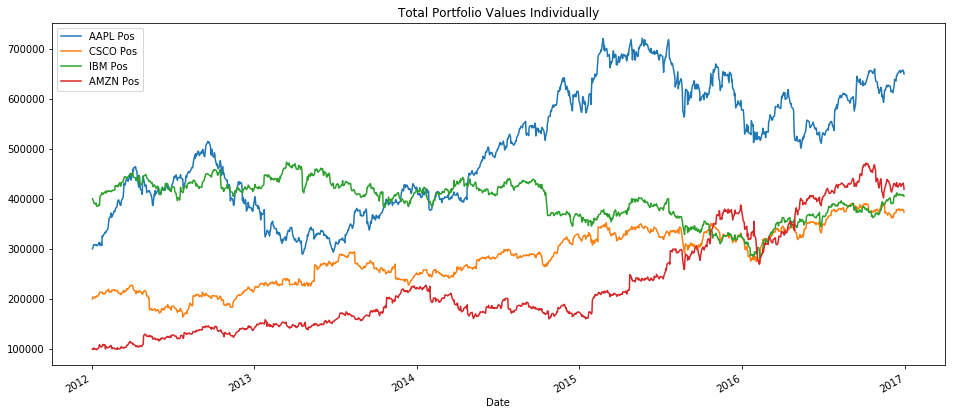

In [31]:
portfolio_values.drop('Total Pos', axis = 1).plot(figsize = (16,7))
plt.title('Total Portfolio Values Individually');

In [32]:
portfolio_values.tail()

,AAPL Pos,CSCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389,1.862933e+06
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563,1.876025e+06
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454,1.868094e+06
2016-12-29,654441.973495,376603.544631,407091.167926,427386.471541,1.865523e+06
2016-12-30,649340.095692,373636.215323,405600.618032,418851.589119,1.847429e+06


### Portfolio Statistics

#### Daily Returns

In [35]:
portfolio_values['Daily Returns'] = portfolio_values['Total Pos'].pct_change(1)

#### Cumulative Returns

In [36]:
cum_ret = 100 * (portfolio_values['Total Pos'][-1]/ portfolio_values['Total Pos'][0] - 1)
print('Our return was {} percent'.format(cum_ret))

Our return was 84.74285181665545 percent


#### Average Daily Return

In [37]:
portfolio_values['Daily Returns'].mean()

0.0005442330716215244

#### Standard Daily Return

In [38]:
portfolio_values['Daily Returns'].std()

0.010568287769161718

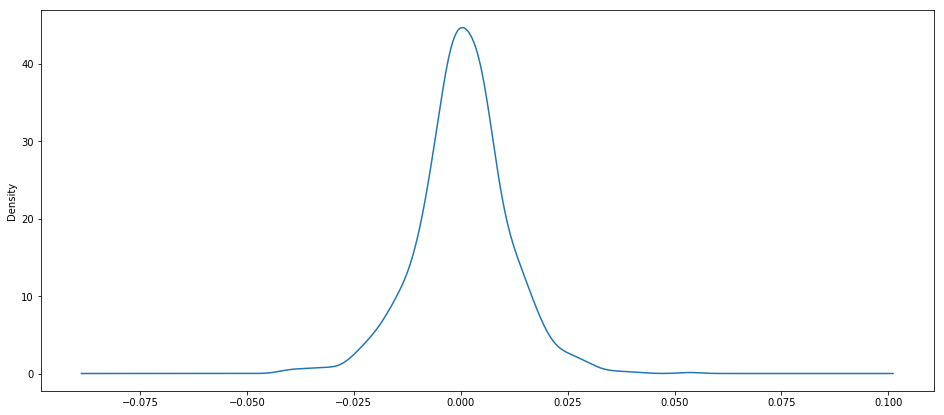

In [40]:
portfolio_values['Daily Returns'].plot(kind = 'kde', figsize = (16,7));

#### Sharpe Ratio

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. 

*Sharpe ratio = (Mean portfolio return − Risk-free rate) / Standard deviation of portfolio return*

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

Since I'm based in the USA, I will use a very low risk-free rate (the rate you would get if you just put your money in a bank, its currently very low in the USA, let's just say its ~0% return). If you are in a different country with higher rates for your trading currency, you can use this trick to convert a yearly rate with a daily rate:

daily_rate = ((1.0 + yearly_rate)**(1/252))-1

Other values people use are things like the 3-month treasury bill or [LIBOR](http://www.investopedia.com/terms/l/libor.asp).

Read more: Sharpe Ratio http://www.investopedia.com/terms/s/sharperatio

In [43]:
SR = portfolio_values['Daily Returns'].mean()/portfolio_values['Daily Returns'].std()

In [44]:
SR

0.05149680662648092

In [45]:
ASR  = (252 ** 0.5)*SR

In [52]:
ASR

0.8174864618859096

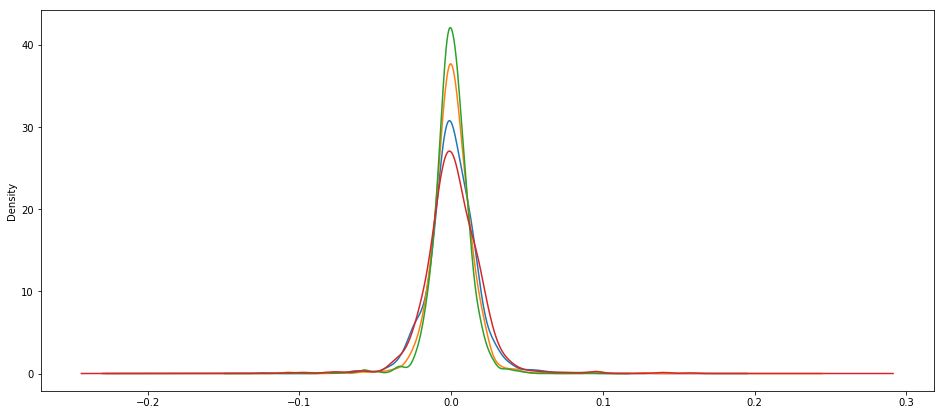

In [55]:
aapl['Adj. Close'].pct_change(1).plot(kind = 'kde', figsize = (16,7))
cisco['Adj. Close'].pct_change(1).plot(kind = 'kde')
ibm['Adj. Close'].pct_change(1).plot(kind = 'kde')
amzn['Adj. Close'].pct_change(1).plot(kind = 'kde');

In [56]:
import numpy as np
np.sqrt(252)* (np.mean(.001-0.0002)/.001)

12.699606293110037

### de nada!